In [6]:
import librosa
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import librosa.display

# Data-Preparation

The ".wav" files are taken and the mel-spectrogram features are extracted from them, which is then loaded to the model to run it.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = "/content/drive/MyDrive/esteth_AI/filtered_2.wav"

8000


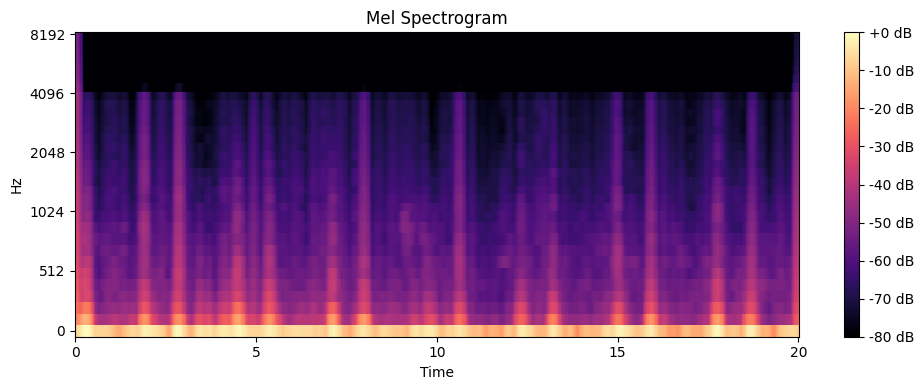

In [7]:
sr = 16000
duration = 5
input_length=sr*duration
n_mels=32
n_fft=2048
hop_length = int(np.floor(input_length / (626 - 1)))

audio_data, sr_original = librosa.load(file_path, sr=None, duration=duration)

print(sr_original)

if sr_original != 16000:
  X = librosa.resample(audio_data, orig_sr=sr_original, target_sr=16000)
  sr = 16000
dur = librosa.get_duration(y=X, sr=sr)

if (round(dur) < duration):
    X = librosa.util.fix_length(X, size=input_length)

S = librosa.feature.melspectrogram(y=X, sr=sr, n_mels=n_mels, n_fft=n_fft, hop_length=hop_length)
mel_spec = librosa.power_to_db(S, ref=np.max)

if mel_spec.shape[1] != 626:
    mel_spec = librosa.util.fix_length(mel_spec, size=626, axis=1)

test_sample = mel_spec.reshape(1,32,626,1)

plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spec, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.tight_layout()
plt.show()

# Load Model

The tensorflow-lite model is loaded and ready for predicting

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
model_path = "/content/drive/MyDrive/esteth_AI/3class_heart_murmur_ResNet.tflite"

In [10]:
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

In [11]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print(input_details[0]['shape'])

[  1  32 626   1]


In [12]:
interpreter.set_tensor(input_details[0]['index'], test_sample)

In [13]:
interpreter.invoke()

In [14]:
tflite_result = interpreter.get_tensor(output_details[0]['index'])

# Predict

In [15]:
classes = ["Normal","Murmur","Artifact"]

predicted_class = np.argmax(tflite_result, axis=1)
print("Predicted class:",classes[predicted_class[0]])

Predicted class: Normal
